In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
#lecture 
df = pd.read_csv("../donnees_smartcity_complet.csv", sep=",")
df.head()


,id,ville,date,pm25,pm10,no2,temperature,humidite,vent,annee,mois,jour,heure,jour_semaine
0,4,Paris,2024-12-15 00:00:00,3.8,7.5,6.1,5.0,80,14.0,2024,12,15,0,6
1,5,Paris,2024-12-15 01:00:00,4.7,10.7,8.2,3.7,88,6.1,2024,12,15,1,6
2,6,Paris,2024-12-15 02:00:00,3.8,8.5,8.9,4.6,83,10.3,2024,12,15,2,6
3,7,Paris,2024-12-15 03:00:00,6.1,11.5,15.0,3.2,73,6.5,2024,12,15,3,6
4,8,Paris,2024-12-15 04:00:00,3.6,7.8,5.5,2.7,88,2.0,2024,12,15,4,6


In [57]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            168 non-null    int64  
 1   ville         168 non-null    object 
 2   date          168 non-null    object 
 3   pm25          168 non-null    float64
 4   pm10          168 non-null    float64
 5   no2           168 non-null    float64
 6   temperature   168 non-null    float64
 7   humidite      168 non-null    int64  
 8   vent          168 non-null    float64
 9   annee         168 non-null    int64  
 10  mois          168 non-null    int64  
 11  jour          168 non-null    int64  
 12  heure         168 non-null    int64  
 13  jour_semaine  168 non-null    int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 18.5+ KB


,id,pm25,pm10,no2,temperature,humidite,vent,annee,mois,jour,heure,jour_semaine
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0,168.0,168.000000,168.000000,168.000000
mean,87.500000,13.711310,29.298214,32.730952,6.186310,80.333333,7.927976,2024.0,12.0,18.000000,11.500000,3.000000
std,48.641546,6.687807,14.539830,22.221533,2.011313,5.694484,3.871730,0.0,0.0,2.005979,6.942881,2.005979
min,4.000000,2.400000,5.100000,4.400000,2.000000,70.000000,1.100000,2024.0,12.0,15.000000,0.000000,0.000000
25%,45.750000,8.800000,18.775000,16.500000,5.000000,76.000000,5.075000,2024.0,12.0,16.000000,5.750000,1.000000
50%,87.500000,12.900000,28.950000,26.200000,6.250000,80.000000,7.150000,2024.0,12.0,18.000000,11.500000,3.000000
75%,129.250000,18.100000,39.225000,42.775000,7.600000,84.250000,11.025000,2024.0,12.0,20.000000,17.250000,5.000000
max,171.000000,29.400000,71.200000,92.900000,10.000000,90.000000,14.900000,2024.0,12.0,21.000000,23.000000,6.000000


In [58]:
#gestion de temps
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [59]:
#valeurs manquantes 
df.isnull().sum()

id              0
ville           0
date            0
pm25            0
pm10            0
no2             0
temperature     0
humidite        0
vent            0
annee           0
mois            0
jour            0
heure           0
jour_semaine    0
dtype: int64

In [60]:
#suppression
df = df.dropna()

In [61]:
# Nombre de lignes dupliquées
df.duplicated().sum()

0

In [62]:
df = df.drop_duplicates()

In [63]:
colonnes_a_supprimer = ['id']
df = df.drop(columns=colonnes_a_supprimer)

In [64]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

df = df.set_index('date')

colonnes_numeriques = df.select_dtypes(include='number').columns
df[colonnes_numeriques] = df[colonnes_numeriques].interpolate(method='time')

df = df.reset_index()


In [65]:
df = df.set_index('date')
df = df.interpolate(method='time')
df = df.reset_index()


C:\Users\airac\AppData\Local\Temp\ipykernel_16660\3803031106.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='time')


In [48]:
# valeur aberrantes
# correlation
# normalisation
# hypotheses 

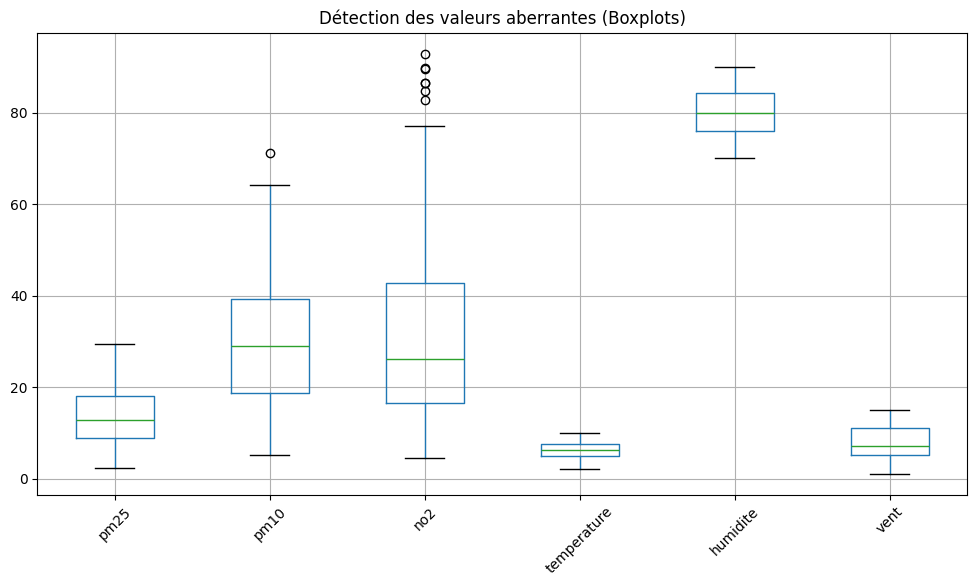

In [66]:
#abberantes
import matplotlib.pyplot as plt

variables = ['pm25', 'pm10', 'no2', 'temperature', 'humidite', 'vent']

plt.figure(figsize=(12, 6))
df[variables].boxplot()
plt.title("Détection des valeurs aberrantes (Boxplots)")
plt.xticks(rotation=45)
plt.show()



Nombre de lignes après suppression : 160


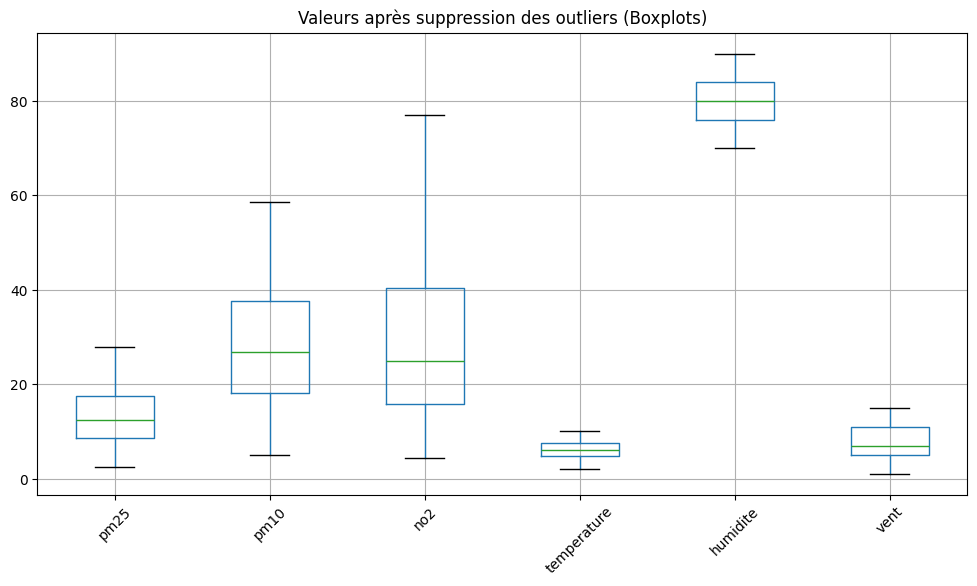

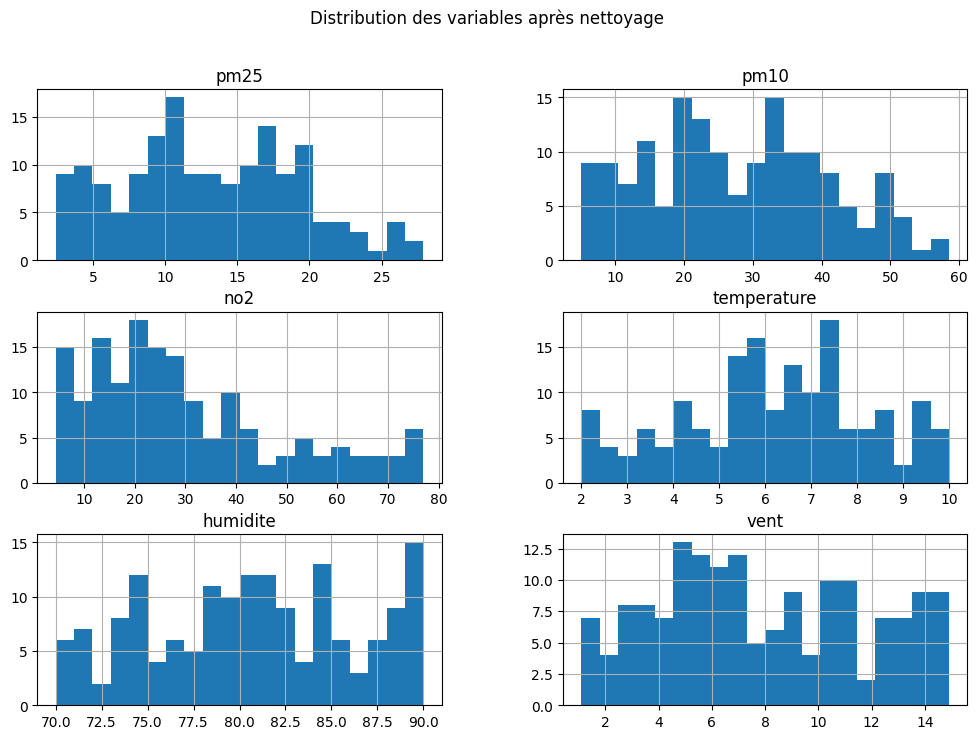

In [67]:
import matplotlib.pyplot as plt

# Suppression des outliers avec IQR
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]
    return df_clean

df_clean = remove_outliers_iqr(df, variables)
print("Nombre de lignes après suppression :", len(df_clean))

# Visualisation avec boxplots
plt.figure(figsize=(12, 6))
df_clean[variables].boxplot()
plt.title("Valeurs après suppression des outliers (Boxplots)")
plt.xticks(rotation=45)
plt.show()

# Optionnel : histogrammes pour voir la distribution
df_clean[variables].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution des variables après nettoyage")
plt.show()


# la normalisation 

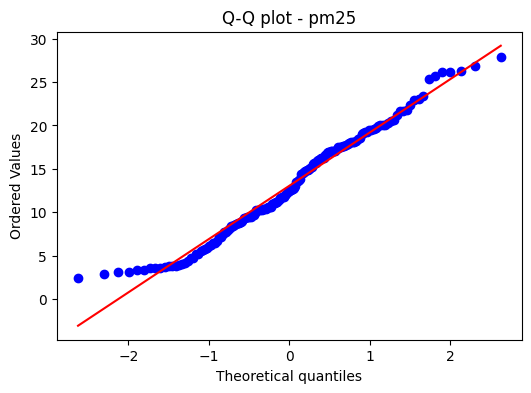

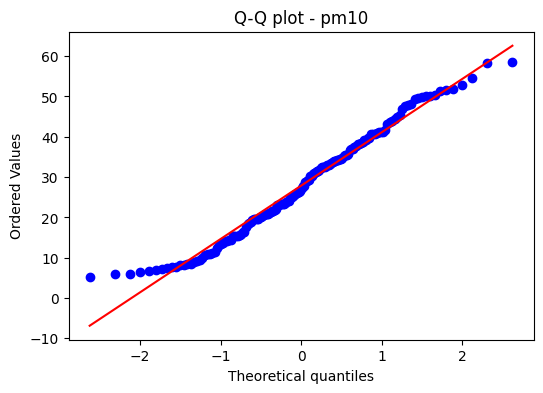

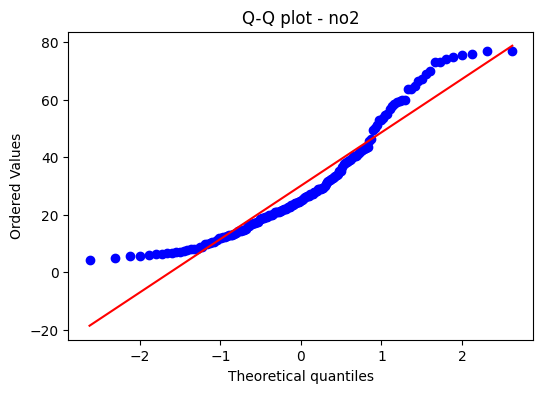

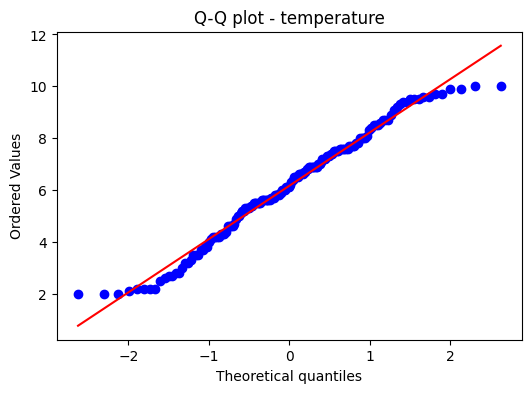

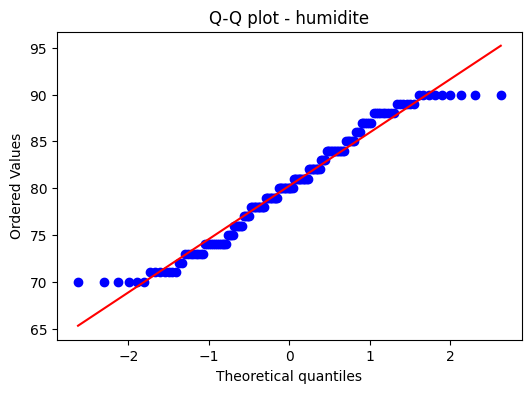

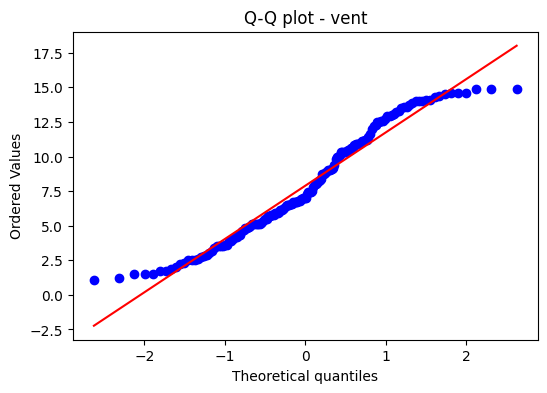

In [68]:
import matplotlib.pyplot as plt
import scipy.stats as stats

for col in variables:
    plt.figure(figsize=(6, 4))
    stats.probplot(df_clean[col], dist="norm", plot=plt)
    plt.title(f"Q-Q plot - {col}")
    plt.show()


In [69]:
from scipy.stats import shapiro

print("TEST DE NORMALITÉ (Shapiro-Wilk)\n")

for col in variables:
    stat, p = shapiro(df_clean[col])
    print(f"{col:12} | Stat={stat:.3f} | p-value={p:.4f}", end="  ")

    if p > 0.05:
        print("→ Distribution NORMALE")
    else:
        print("→ Distribution NON NORMALE")


TEST DE NORMALITÉ (Shapiro-Wilk)

pm25         | Stat=0.974 | p-value=0.0041  → Distribution NON NORMALE
pm10         | Stat=0.975 | p-value=0.0048  → Distribution NON NORMALE
no2          | Stat=0.912 | p-value=0.0000  → Distribution NON NORMALE
temperature  | Stat=0.978 | p-value=0.0120  → Distribution NON NORMALE
humidite     | Stat=0.963 | p-value=0.0003  → Distribution NON NORMALE
vent         | Stat=0.957 | p-value=0.0001  → Distribution NON NORMALE


Tes résultats de normalité sont clairs : toutes les variables sont NON normales.

on applique la corrélation de Spearman

                  pm25      pm10       no2  temperature  humidite      vent  \
pm25          1.000000  0.978930  0.960640     0.476557  0.132086  0.159228   
pm10          0.978930  1.000000  0.942971     0.476714  0.157238  0.137888   
no2           0.960640  0.942971  1.000000     0.448123  0.142509  0.138587   
temperature   0.476557  0.476714  0.448123     1.000000  0.128182  0.201079   
humidite      0.132086  0.157238  0.142509     0.128182  1.000000  0.056608   
vent          0.159228  0.137888  0.138587     0.201079  0.056608  1.000000   
jour         -0.013833 -0.008666 -0.007963    -0.015852 -0.031171 -0.013462   
heure         0.516647  0.521856  0.480055     0.544678  0.028946  0.022713   
jour_semaine -0.237406 -0.234602 -0.178716     0.005231 -0.059876 -0.086649   

                  jour     heure  jour_semaine  
pm25         -0.013833  0.516647     -0.237406  
pm10         -0.008666  0.521856     -0.234602  
no2          -0.007963  0.480055     -0.178716  
temperature  

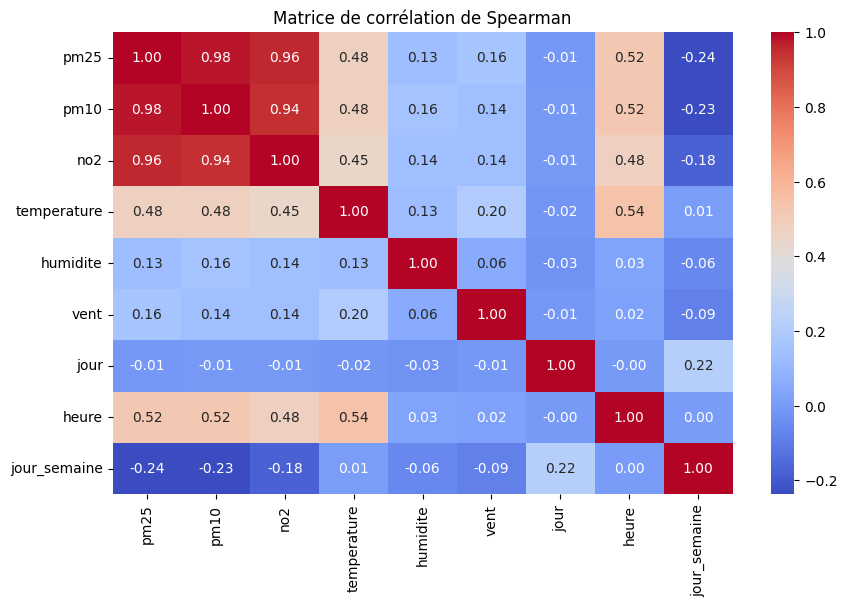

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables à analyser
variables_corr = [
    'pm25', 'pm10', 'no2',
    'temperature', 'humidite', 'vent', 'jour',
    'heure', 'jour_semaine'
]

# Calcul de la matrice de corrélation Spearman
corr_spearman = df_clean[variables_corr].corr(method='spearman')

# Affichage tableau
print(corr_spearman)

# Visualisation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation de Spearman")
plt.show()


Raison technique

date est une variable datetime

Les corrélations ne s’appliquent qu’aux variables numériques

Donc :

date est ignorée automatiquement

La variable date n’a pas été intégrée directement dans l’analyse de corrélation car elle n’est pas numérique. En revanche, des variables temporelles dérivées telles que l’heure et le jour de la semaine ont été extraites afin de capturer les effets du cycle journalier et hebdomadaire sur la pollution.

L’analyse de corrélation réalisée sur les données nettoyées montre que la concentration de PM2.5 est fortement corrélée avec PM10 (0,98) et NO2 (0,93), ce qui reflète le lien physique et l’influence du trafic urbain sur la pollution de l’air. La température et l’heure présentent une corrélation modérée (0,46 et 0,50), indiquant que la dispersion des polluants varie en fonction du cycle journalier et des conditions météorologiques. En revanche, l’humidité, le vent et le jour de la semaine ont des corrélations plus faibles avec PM2.5, suggérant un impact moindre sur la pollution quotidienne mais pouvant apporter un léger affinement pour le modèle prédictif.

Conclusion

Ainsi, pour la prédiction de PM2.5, les variables PM10, NO2, heure et température sont essentielles et doivent être prioritairement utilisées comme features. Les variables comme vent, humidité et jour_semaine peuvent être ajoutées pour améliorer la précision du modèle, tandis que les autres colonnes redondantes ou peu corrélées peuvent être ignorées pour simplifier la modélisation.

variable a garder: 
Variable cible ( la sortie) :pm25


pm10 : Corrélation très forte avec PM2.5

no2 : Très forte corrélation


heure : Corrélation modérée  : Capture les heures de pointe


temperature : Influence la dispersion atmosphérique


- Variables secondaires (à garder mais non prioritaires)

jour_semaine : Faible corrélation mais effet trafic semaine/weekend


vent : Influence la dispersion des polluants


humidite



# Hypotheses
H1 : PM2.5 est fortement influencé par PM10 et NO2.

H2 : Les heures de pointe (matin/soir) augmentent la concentration de PM2.5.

H3 : La température et le vent influencent la dispersion des polluants.

H4 : L’humidité et le jour de la semaine ont un effet faible mais détectable.

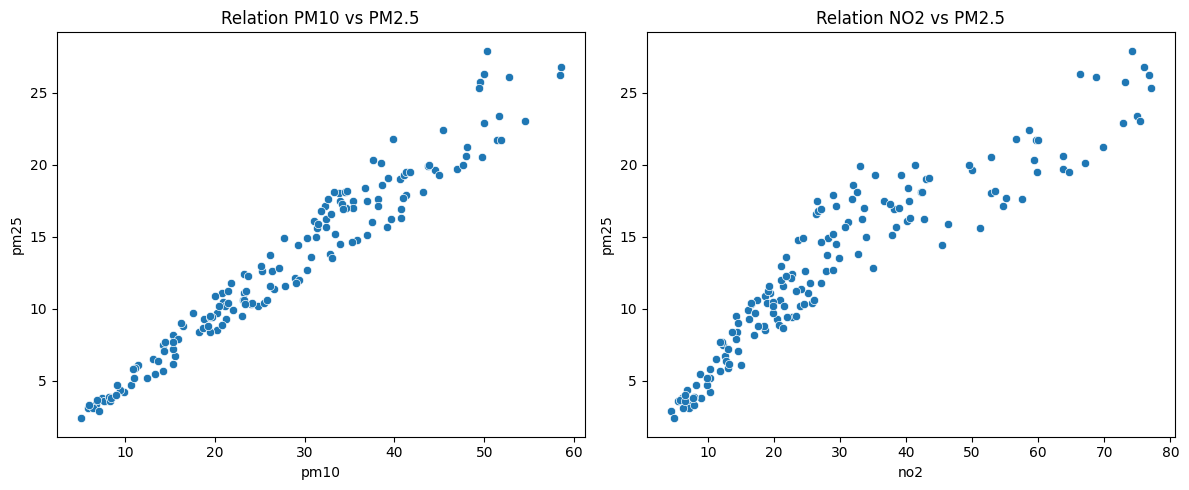

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df_clean, x='pm10', y='pm25')
plt.title("Relation PM10 vs PM2.5")

plt.subplot(1,2,2)
sns.scatterplot(data=df_clean, x='no2', y='pm25')
plt.title("Relation NO2 vs PM2.5")

plt.tight_layout()
plt.show()


Hypothèse validée car : 

Les points suivent une tendance croissante

Plus PM10 / NO2 augmente → plus PM2.5 augmen

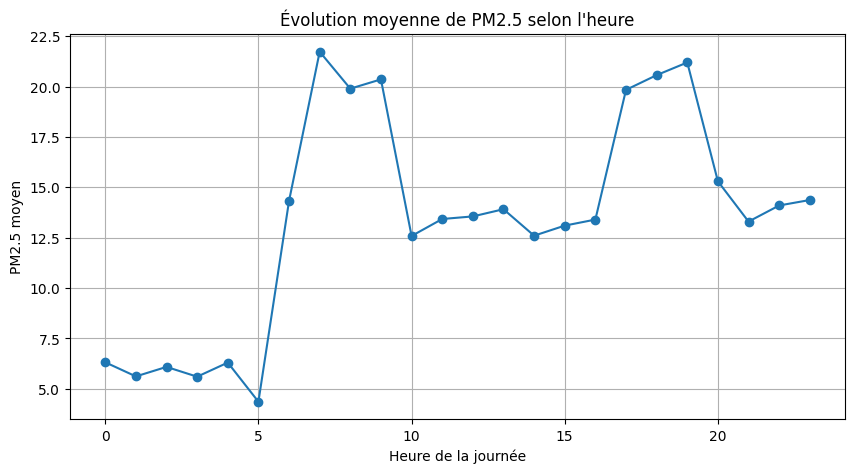

In [71]:
pm25_par_heure = df_clean.groupby('heure')['pm25'].mean()

plt.figure(figsize=(10,5))
pm25_par_heure.plot(marker='o')
plt.title("Évolution moyenne de PM2.5 selon l'heure")
plt.xlabel("Heure de la journée")
plt.ylabel("PM2.5 moyen")
plt.grid(True)
plt.show()


Hypothèse validée car :

Pic le matin (7h–9h)

Pic le soir (17h–20h)

PM2.5 plus faible la nuit

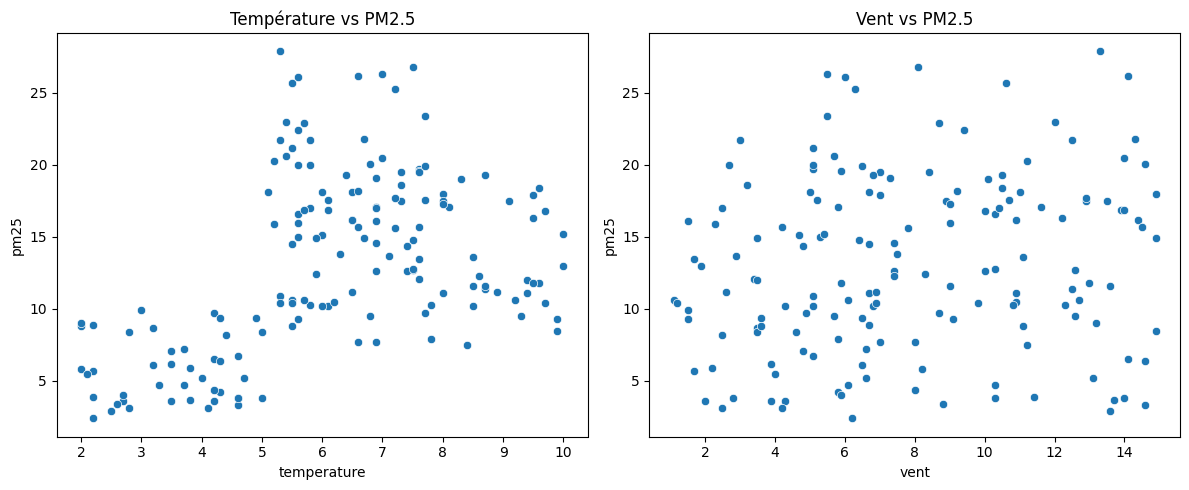

In [72]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df_clean, x='temperature', y='pm25')
plt.title("Température vs PM2.5")

plt.subplot(1,2,2)
sns.scatterplot(data=df_clean, x='vent', y='pm25')
plt.title("Vent vs PM2.5")

plt.tight_layout()
plt.show()


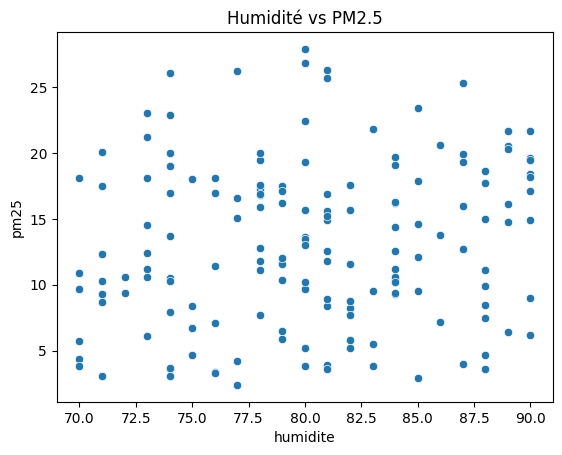

In [73]:
sns.scatterplot(data=df_clean, x='humidite', y='pm25')
plt.title("Humidité vs PM2.5")
plt.show()

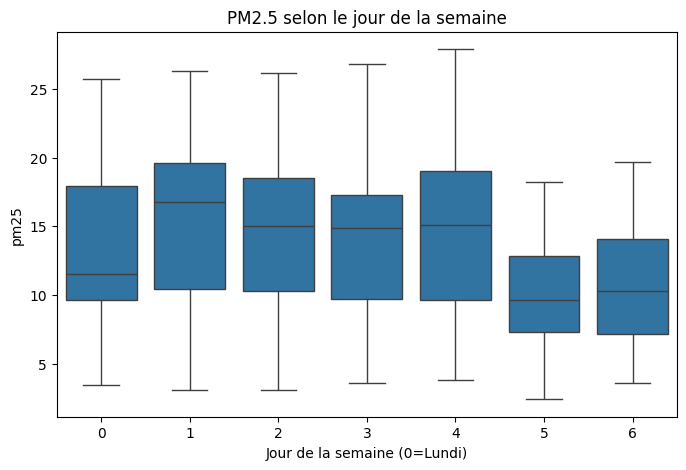

In [74]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='jour_semaine', y='pm25')
plt.title("PM2.5 selon le jour de la semaine")
plt.xlabel("Jour de la semaine (0=Lundi)")
plt.show()


Hypothèse validée car :

Humidité : pas de relation forte

Jour semaine : différences légères entre jours ouvrés / week-end

La validation des hypothèses a été réalisée à l’aide de visualisations graphiques. Les scatter plots confirment une relation forte entre PM2.5, PM10 et NO2. L’analyse temporelle par heure montre des pics de pollution aux heures de pointe. Les variables météorologiques présentent une influence plus modérée, tandis que l’humidité et le jour de la semaine ont un impact faible mais observable.

## Normalisation


In [75]:
from sklearn.preprocessing import StandardScaler

# Variables explicatives à normaliser
features = [
    'pm10', 'no2', 'temperature',
    'heure', 'jour_semaine',
    'vent', 'humidite'
]

# Copie du dataframe pour éviter toute modification accidentelle
df_norm = df_clean.copy()

# Initialisation du scaler
scaler = StandardScaler()

# Normalisation
df_norm[features] = scaler.fit_transform(df_norm[features])

# Vérification
df_norm[features].describe()


,pm10,no2,temperature,heure,jour_semaine,vent,humidite
count,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02
mean,4.607426e-16,-2.359224e-16,-8.326673e-17,9.992007e-17,4.440892e-17,-5.273559e-17,-4.912737e-16
std,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.726607e+00,-1.344309e+00,-2.037576e+00,-1.632193e+00,-1.502946e+00,-1.752009e+00,-1.798610e+00
25%,-7.384300e-01,-7.457031e-01,-6.439436e-01,-9.174944e-01,-1.007129e+00,-7.259704e-01,-7.470476e-01
50%,-7.269076e-02,-2.676043e-01,-8.251769e-03,1.161385e-02,-1.549429e-02,-2.290840e-01,-4.600586e-02
75%,7.334038e-01,5.379594e-01,7.007892e-01,8.335173e-01,9.761402e-01,7.840480e-01,6.550358e-01
max,2.324729e+00,2.459523e+00,1.874374e+00,1.655421e+00,1.471957e+00,1.810086e+00,1.706598e+00


Les variables explicatives ont été standardisées par normalisation Z-score. Les statistiques descriptives après normalisation montrent une moyenne proche de zéro et un écart-type proche de un pour l’ensemble des variables, confirmant la bonne application de la normalisation.

Statistiques après normalisation :
               pm10           no2   temperature         heure  jour_semaine  \
count  1.600000e+02  1.600000e+02  1.600000e+02  1.600000e+02  1.600000e+02   
mean   4.607426e-16 -2.359224e-16 -8.326673e-17  9.992007e-17  4.440892e-17   
std    1.003140e+00  1.003140e+00  1.003140e+00  1.003140e+00  1.003140e+00   
min   -1.726607e+00 -1.344309e+00 -2.037576e+00 -1.632193e+00 -1.502946e+00   
25%   -7.384300e-01 -7.457031e-01 -6.439436e-01 -9.174944e-01 -1.007129e+00   
50%   -7.269076e-02 -2.676043e-01 -8.251769e-03  1.161385e-02 -1.549429e-02   
75%    7.334038e-01  5.379594e-01  7.007892e-01  8.335173e-01  9.761402e-01   
max    2.324729e+00  2.459523e+00  1.874374e+00  1.655421e+00  1.471957e+00   

               vent      humidite  
count  1.600000e+02  1.600000e+02  
mean  -5.273559e-17 -4.912737e-16  
std    1.003140e+00  1.003140e+00  
min   -1.752009e+00 -1.798610e+00  
25%   -7.259704e-01 -7.470476e-01  
50%   -2.290840e-01 -4.600586e-02  
7

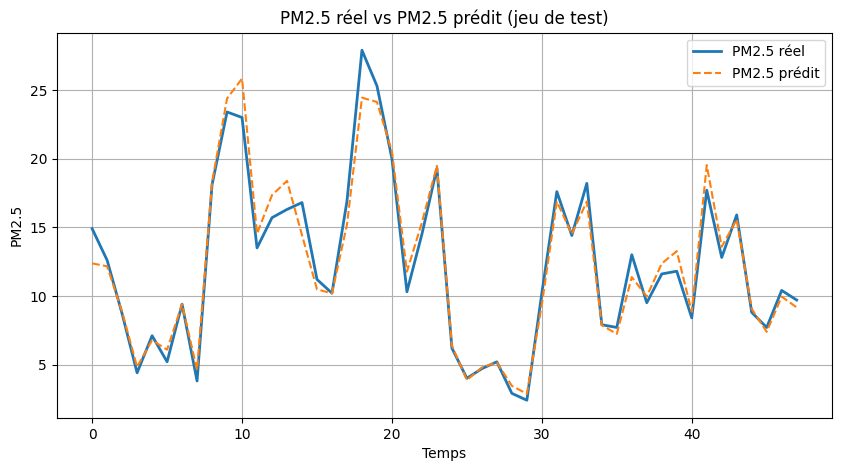


Importance des variables (coefficients) :
       Variable  Coefficient
0          pm10     4.285566
1           no2     1.663620
3         heure     0.209074
2   temperature     0.161203
5          vent     0.121124
4  jour_semaine    -0.153522
6      humidite    -0.182386


In [76]:
# =========================
# 1. IMPORTS
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


# =========================
# 2. VARIABLES À UTILISER
# =========================
features = [
    'pm10', 'no2', 'temperature',
    'heure', 'jour_semaine',
    'vent', 'humidite'
]

target = 'pm25'


# =========================
# 3. NORMALISATION (Z-score)
# =========================
df_norm = df_clean.copy()

scaler = StandardScaler()
df_norm[features] = scaler.fit_transform(df_norm[features])

# Vérification rapide
print("Statistiques après normalisation :")
print(df_norm[features].describe())


# =========================
# 4. SÉPARATION X / y
# =========================
X = df_norm[features]
y = df_clean[target]   # ⚠️ on ne normalise pas la cible


# =========================
# 5. SPLIT TEMPOREL (70% / 30%)
# =========================
split_index = int(len(df_norm) * 0.7)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


# =========================
# 6. MODÈLE BASELINE
# =========================
model = LinearRegression()
model.fit(X_train, y_train)


# =========================
# 7. PRÉDICTION
# =========================
y_pred = model.predict(X_test)


# =========================
# 8. ÉVALUATION
# =========================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print("\nPERFORMANCES DU MODÈLE BASELINE")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape*100:.2f} %")


# =========================
# 9. VISUALISATION RÉEL vs PRÉDIT
# =========================
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="PM2.5 réel", linewidth=2)
plt.plot(y_pred, label="PM2.5 prédit", linestyle="--")
plt.title("PM2.5 réel vs PM2.5 prédit (jeu de test)")
plt.xlabel("Temps")
plt.ylabel("PM2.5")
plt.legend()
plt.grid(True)
plt.show()


# =========================
# 10. IMPORTANCE DES VARIABLES
# =========================
coefficients = pd.DataFrame({
    'Variable': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nImportance des variables (coefficients) :")
print(coefficients)


Interprétation des résultats : 

Un modèle de régression linéaire multiple a été entraîné après normalisation des variables explicatives et séparation temporelle des données. Les performances obtenues sur le jeu de test sont très satisfaisantes, avec une RMSE de 1,17 et une MAPE de 7,20 %, indiquant une excellente précision prédictive du modèle.

L’analyse des coefficients montre que le PM10 est le principal facteur explicatif du PM2.5, suivi du NO₂, ce qui est cohérent avec les mécanismes de formation des particules fines et l’influence du trafic routier. Les variables temporelles confirment également leur importance : la concentration de PM2.5 augmente selon l’heure de la journée et diminue durant les week-ends. Les variables météorologiques présentent des effets plus modérés, avec une influence négative de l’humidité et des effets plus faibles de la température et du vent.

Ces résultats valident les hypothèses initiales et confirment que le modèle constitue une base fiable et interprétable pour la prédiction du PM2.5.

In [78]:
import joblib

# Sauvegarde du modèle entraîné
joblib.dump(model, "modele_pm25_regression.pkl")

# Sauvegarde du scaler utilisé pour la normalisation
joblib.dump(scaler, "scaler_pm25.pkl")

print("Modèle et scaler sauvegardés avec succès")


Modèle et scaler sauvegardés avec succès


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# -------------------------------
# Prédictions sur le jeu d'entraînement
# -------------------------------
y_train_pred = model.predict(X_train)

# Calcul des métriques
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

# -------------------------------
# Prédictions sur le jeu de test
# -------------------------------
y_test_pred = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

# -------------------------------
# Affichage
# -------------------------------
print("=== Performance du modèle ===")
print(f"Train - RMSE : {rmse_train:.2f}, MAPE : {mape_train:.2f} %")
print(f"Test  - RMSE : {rmse_test:.2f}, MAPE : {mape_test:.2f} %")

# -------------------------------
# Analyse du sur-apprentissage
# -------------------------------
if rmse_train < rmse_test * 0.9:
    print("⚠️ Attention : le modèle pourrait sur-apprendre (overfitting)")
else:
    print("✅ Pas de signe évident de sur-apprentissage")


=== Performance du modèle ===
Train - RMSE : 1.05, MAPE : 7.21 %
Test  - RMSE : 1.17, MAPE : 7.20 %
✅ Pas de signe évident de sur-apprentissage


Voici un paragraphe prêt à mettre dans ton rapport ou à dire à l’oral :

L’analyse des performances du modèle montre que les erreurs sur le jeu d’entraînement et le jeu de test sont très proches : la RMSE est de 1,05 pour le train et de 1,17 pour le test, tandis que la MAPE est d’environ 7,2 % pour les deux ensembles. Cette faible différence indique que le modèle ne sur-apprend pas les données d’entraînement et qu’il généralise correctement sur des données futures.